In [28]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [29]:
import pandas as pd

In [81]:
df_train=pd.read_csv('/content/drive/MyDrive/MLData/train_Loan.csv')
df_test=pd.read_csv('/content/drive/MyDrive/MLData/test_Loan.csv')

In [82]:
df_train.shape

(614, 13)

In [83]:
df_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Data Preprocessing
1. Have to fill NaN places with 


1.   a->categorical values= use Mode
2.   a-> numerical values= use mean/median

2.Have to use encoding for String values as the model takes only numerical values as input
 two technics used: one-hot encoding , label encoding

3 . bring down the values in the range of 0 and 1 to reduce the computational power



In [84]:
# checking missing values in the data

df_train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [85]:
df_test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [86]:
df_train.dtypes # object -> Categorical data, # float64-> numerical data

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [87]:
#filling mising values of categorical variables with mode
df_train['Gender'].fillna(df_train['Gender'].mode()[0],inplace=True)
df_train['Married'].fillna(df_train['Married'].mode()[0],inplace=True)
df_train['Dependents'].fillna(df_train['Dependents'].mode()[0],inplace=True)
df_train['Self_Employed'].fillna(df_train['Self_Employed'].mode()[0],inplace=True)
df_train['Loan_Amount_Term'].fillna(df_train['Loan_Amount_Term'].mode()[0],inplace=True)
df_train['Credit_History'].fillna(df_train['Credit_History'].mode()[0],inplace=True)


In [88]:
#filing continuous variable with mean values

df_train['LoanAmount'].fillna(df_train['LoanAmount'].mean(),inplace=True)

In [89]:
# Converting Categories to numbers
df_train['Gender']=df_train['Gender'].map({'Male':0,'Female':1})
df_train['Married']=df_train['Married'].map({'No':0,'Yes':1})
df_train['Dependents']=df_train['Dependents'].map({'0':0,'1':1,'2':2,'3+':3})
df_train['Education']=df_train['Education'].map({'Graduate':1,'Not Graduate':0})
df_train['Self_Employed']=df_train['Self_Employed'].map({'No':0,'Yes':1})
df_train['Property_Area']=df_train['Property_Area'].map({'Urban':2,'Rural':0,'Semiurban':1})
df_train['Loan_Status']=df_train['Loan_Status'].map({'Y':1,'N':0})


In [90]:
df_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0,0,0,1,0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,0,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,0,1,0,1,1,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,0,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,0,0,0,1,0,6000,0.0,141.000000,360.0,1.0,2,1


In [91]:
df_train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [95]:
df_train.dtypes

Loan_ID               object
Gender                 int64
Married                int64
Dependents           float64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int64
dtype: object

In [77]:
#Bringing all the variables in range 0 to 1
#Xnorm=X-Xmin/(Xmax-Xmin)

In [92]:
df_train['Dependents']=(df_train['Dependents']-df_train['Dependents'].min())/(df_train['Dependents'].max()-df_train['Dependents'].min())

In [97]:
#applying for loop to bring all the variables in range 0 to 1

for i in df_train.columns[1:]:
  df_train[i]=(df_train[i]-df_train[i].min())/(df_train[i].max()-df_train[i].min())

In [98]:
df_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0.0,0.0,0.000000,1.0,0.0,0.070489,0.000000,0.198860,0.74359,1.0,1.0,1.0
1,LP001003,0.0,1.0,0.333333,1.0,0.0,0.054830,0.036192,0.172214,0.74359,1.0,0.0,0.0
2,LP001005,0.0,1.0,0.000000,1.0,1.0,0.035250,0.000000,0.082489,0.74359,1.0,1.0,1.0
3,LP001006,0.0,1.0,0.000000,0.0,0.0,0.030093,0.056592,0.160637,0.74359,1.0,1.0,1.0
4,LP001008,0.0,0.0,0.000000,1.0,0.0,0.072356,0.000000,0.191027,0.74359,1.0,1.0,1.0


In [100]:
#saving the pre processed data
df_train.to_csv('train_new.csv',index=False)

Steps to build the neural Network



1.   Loading the dataset
2.   Creating the traning and validation sets
3.Defining the model architecture
4.Compiling the model(defining loss/cost function,optimizer)

loass/cost function; MSE,binary_crossentropy

optimizers: SGD,RMSProp,Adam

5. Training the model
6. evaluating model performance on both trainng and validation set



In [101]:
#importing the required libraries
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline


In [103]:
# loading the pre processed data
train_data=pd.read_csv('train_new.csv')

In [104]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0.0,0.0,0.000000,1.0,0.0,0.070489,0.000000,0.198860,0.74359,1.0,1.0,1.0
1,LP001003,0.0,1.0,0.333333,1.0,0.0,0.054830,0.036192,0.172214,0.74359,1.0,0.0,0.0
2,LP001005,0.0,1.0,0.000000,1.0,1.0,0.035250,0.000000,0.082489,0.74359,1.0,1.0,1.0
3,LP001006,0.0,1.0,0.000000,0.0,0.0,0.030093,0.056592,0.160637,0.74359,1.0,1.0,1.0
4,LP001008,0.0,0.0,0.000000,1.0,0.0,0.072356,0.000000,0.191027,0.74359,1.0,1.0,1.0


In [106]:
train_data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [107]:
train_data.dtypes

Loan_ID               object
Gender               float64
Married              float64
Dependents           float64
Education            float64
Self_Employed        float64
ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area        float64
Loan_Status          float64
dtype: object

In [108]:
#removing Loan_Id
train_data=train_data.drop('Loan_ID',axis=1)

In [109]:
train_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0.0,0.0,0.000000,1.0,0.0,0.070489,0.000000,0.198860,0.74359,1.0,1.0,1.0
1,0.0,1.0,0.333333,1.0,0.0,0.054830,0.036192,0.172214,0.74359,1.0,0.0,0.0
2,0.0,1.0,0.000000,1.0,1.0,0.035250,0.000000,0.082489,0.74359,1.0,1.0,1.0
3,0.0,1.0,0.000000,0.0,0.0,0.030093,0.056592,0.160637,0.74359,1.0,1.0,1.0
4,0.0,0.0,0.000000,1.0,0.0,0.072356,0.000000,0.191027,0.74359,1.0,1.0,1.0


In [110]:
train_data.shape

(614, 12)

In [111]:
train_data.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [112]:
#separating independent and dependent variables


In [115]:
# storing all independent variables as X
X=train_data.drop('Loan_Status',axis=1)

In [116]:
#storing the dependent variable as Y
Y=train_data['Loan_Status']

In [117]:
X.shape,Y.shape

((614, 11), (614,))

Creating training and validation sets



1.   stratify will make the distribution of classes in train and test similar
2.   random state to regenerate the same train and test set
3. test size 0.2 will keep 20% data for test and 80% data for train



In [119]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,stratify=train_data['Loan_Status'],test_size=0.2,random_state=10)

In [121]:
(x_train.shape,y_train.shape),(x_test.shape,y_test.shape)

(((491, 11), (491,)), ((123, 11), (123,)))

**Defining the model Architecture**

In [122]:
# checking version of keras
import keras
print(keras.__version__)

2.12.0


In [124]:
#checking the version of tensorflow # keras use tensorflow in backend
import tensorflow as tf
print(tf.__version__)

2.12.0


In [125]:
#importing sequential model
from keras.models import Sequential

In [126]:
#importing diferent layers from keras
from keras.layers import InputLayer,Dense

In [129]:
input_neurons=x_train.shape[1] # no of input neurons


In [130]:
# no of output neurons
output_neurons=1 # binary classification

In [134]:
#defining hidden layers and neuron in each layer - hyperparameters

no_of_hidden_layers=2
neurons_hidden_layer_1=10
neurons_hidden_layer_2=5

In [135]:
# activation function of different layers
# have use relu for hidden layers
# sigmoid for output layers as it a binary classification

In [136]:
# defining model architecture
model=Sequential()
model.add(InputLayer(input_shape=(input_neurons,)))
model.add(Dense(units=neurons_hidden_layer_1,activation='relu'))
model.add(Dense(units=neurons_hidden_layer_2,activation='relu'))
model.add(Dense(units=output_neurons,activation='sigmoid'))

In [137]:
model.summary() #summary of model

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 10)                120       
                                                                 
 dense_4 (Dense)             (None, 5)                 55        
                                                                 
 dense_5 (Dense)             (None, 1)                 6         
                                                                 
Total params: 181
Trainable params: 181
Non-trainable params: 0
_________________________________________________________________


In [139]:
# number of parameters between input and first hidden layer
input_neurons*neurons_hidden_layer_1+10   # +10 for bias

120

In [140]:
neurons_hidden_layer_1*neurons_hidden_layer_2+5

55

In [142]:
neurons_hidden_layer_2*output_neurons+1

6

Compiling the model(defining loss and optimizer)

1.   loss as binary_crossentropy,since its a binary classification
2.   adam optimizer
3. accuracy as evaluation metric



In [143]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

Training the model

In [144]:
model_history=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=50)

Epoch 1/50
16/16 [==============================] - 5s 18ms/step - loss: 0.5974 - accuracy: 0.6884 - val_loss: 0.5931 - val_accuracy: 0.6829
Epoch 2/50
16/16 [==============================] - 0s 5ms/step - loss: 0.5901 - accuracy: 0.6864 - val_loss: 0.5856 - val_accuracy: 0.6911
Epoch 3/50
16/16 [==============================] - 0s 8ms/step - loss: 0.5847 - accuracy: 0.6864 - val_loss: 0.5797 - val_accuracy: 0.6911
Epoch 4/50
16/16 [==============================] - 0s 9ms/step - loss: 0.5813 - accuracy: 0.6864 - val_loss: 0.5758 - val_accuracy: 0.6911
Epoch 5/50
16/16 [==============================] - 0s 8ms/step - loss: 0.5785 - accuracy: 0.6864 - val_loss: 0.5734 - val_accuracy: 0.6911
Epoch 6/50
16/16 [==============================] - 0s 8ms/step - loss: 0.5756 - accuracy: 0.6884 - val_loss: 0.5714 - val_accuracy: 0.6911
Epoch 7/50
16/16 [==============================] - 0s 8ms/step - loss: 0.5728 - accuracy: 0.6884 - val_loss: 0.5689 - val_accuracy: 0.6911
Epoch 8/50
16/16 [=

In [150]:
#Evaluating the modle performance

prediction=(model.predict(x_test)>0.5).astype("int32")

4/4 [==============================] - 0s 3ms/step


In [151]:
prediction

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
    

In [152]:
#calcualting the accuracy on validation set
accuracy_score(y_test,prediction)

0.8130081300813008

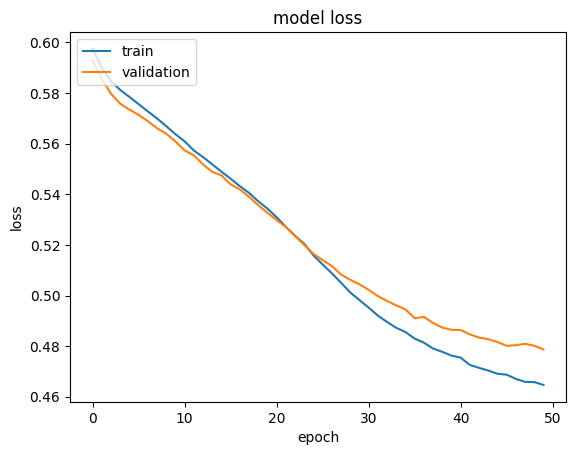

In [154]:
#summary history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper left')
plt.show()       


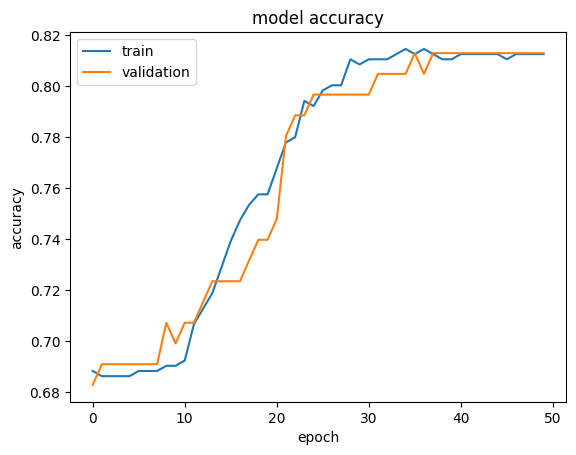

In [156]:
#summary history for acuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper left')
plt.show()